<a href="https://colab.research.google.com/github/vensonpig/AI/blob/main/%E4%BA%BA%E5%B7%A5%E6%99%BA%E6%85%A7%E6%9C%9F%E6%9C%AB%E4%BD%9C%E6%A5%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 中文wordnet
完整用法：https://github.com/lopentu/CwnGraph

- 早期利用字詞表達文章的用法，可以透過查詢wordnet，找出查詢字跟那些字有關係。
- wordnet是透過人工的方式，建立起字詞之間的關係
- 本範例介紹中文的wordnet，查詢"頭"這個字，看有多少跟"頭"相關的字詞
- 另外介紹英文的wordnet，查詢跟"dog"相似的字詞

# One-Hot Encoding 獨熱碼
- one-hot encoding是用來向量表示字詞的方式，特點是每一個字詞之間皆為正交(orthogonal)
- 字詞向量正交，才能排除字詞之間互相影響
- one-hot的優點也是缺點，不同詞的向量正交，無法衡量不同詞之間的關係
- 只能反映某個詞是否在句中出現，無法衡量詞的重要性
- one-hot是高維稀疏矩陣，浪費計算能力與儲存空間
- 本範例示範如何把國家表示成one-hot encoding表示法

In [ ]:
import numpy as np
import pandas as pd
country=['Taiwan','Australia','Ireland','Australia','Ireland','Taiwan']
age=[25,30,45,35,22,36]
salary=[20000,32000,59000,60000,43000,52000]
dic={'Country':country,'Age':age,'Salary':salary}
data=pd.DataFrame(dic)
data

,Country,Age,Salary
0,Taiwan,25,20000
1,Australia,30,32000
2,Ireland,45,59000
3,Australia,35,60000
4,Ireland,22,43000
5,Taiwan,36,52000


## Label encoding
利用LabelEcoder函數，將Country欄位進行Label encoding編碼<br>
Australia：0<br>
Ireland：1<br>
Taiwan：2<br>

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_le=pd.DataFrame(dic)
data_le['Country'] = labelencoder.fit_transform(data['Country'])
data_le

,Country,Age,Salary
0,2,25,20000
1,0,30,32000
2,1,45,59000
3,0,35,60000
4,1,22,43000
5,2,36,52000


## One hot encoding
利用OneHotEcoder函數，將Country欄位進行Ont-Hot encoding編碼
<table><tr><td>Australia(0)</td><td>Ireland(1)</td><td>Taiwan(2)</td></tr></table>

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("Country", OneHotEncoder(), [0])], remainder = 'passthrough')
data_str_ohe=ct.fit_transform(data_le)
pd.DataFrame(data_str_ohe)

,0,1,2,3,4
0,0.0,0.0,1.0,25.0,20000.0
1,1.0,0.0,0.0,30.0,32000.0
2,0.0,1.0,0.0,45.0,59000.0
3,1.0,0.0,0.0,35.0,60000.0
4,0.0,1.0,0.0,22.0,43000.0
5,0.0,0.0,1.0,36.0,52000.0


## Pandas.get_dummies

In [ ]:
data_dum = pd.get_dummies(data)
pd.DataFrame(data_dum)

,Age,Salary,Country_Australia,Country_Ireland,Country_Taiwan
0,25,20000,0,0,1
1,30,32000,1,0,0
2,45,59000,0,1,0
3,35,60000,1,0,0
4,22,43000,0,1,0
5,36,52000,0,0,1


In [ ]:
!pip install CwnGraph

In [ ]:
from CwnGraph import CwnImage
cwn = CwnImage.latest()
lemmas = cwn.find_lemma("頭")
lemmas

[<CwnLemma: 罐頭_1>,
 <CwnLemma: 年頭_1>,
 <CwnLemma: 山頭_1>,
 <CwnLemma: 頭_1>,
 <CwnLemma: 頭疼_1>,
 <CwnLemma: 從頭_1>,
 <CwnLemma: 龍頭_1>,
 <CwnLemma: 口頭_1>,
 <CwnLemma: 出頭_1>,
 <CwnLemma: 斷頭_1>,
 <CwnLemma: 分頭_1>,
 <CwnLemma: 回頭_1>,
 <CwnLemma: 磕頭_1>,
 <CwnLemma: 頭號_1>,
 <CwnLemma: 頭部_1>,
 <CwnLemma: 點頭_1>,
 <CwnLemma: 抬頭_1>,
 <CwnLemma: 街頭_1>,
 <CwnLemma: 裡頭_1>,
 <CwnLemma: 源頭_1>,
 <CwnLemma: 頭家_1>,
 <CwnLemma: 工頭_1>,
 <CwnLemma: 大舌頭_1>,
 <CwnLemma: 老頭_1>,
 <CwnLemma: 老頭子_1>,
 <CwnLemma: 花頭_1>,
 <CwnLemma: 白頭翁_1>,
 <CwnLemma: 頭彩_1>,
 <CwnLemma: 人頭稅_1>,
 <CwnLemma: 戶頭_1>,
 <CwnLemma: 頭癬_1>,
 <CwnLemma: 木頭_1>,
 <CwnLemma: 領頭_1>,
 <CwnLemma: 頭錘_1>,
 <CwnLemma: 零頭_1>,
 <CwnLemma: 接頭_1>,
 <CwnLemma: 頭狀_1>,
 <CwnLemma: 白頭鷹_1>,
 <CwnLemma: 貓頭鷹_1>,
 <CwnLemma: 頭蝨_1>,
 <CwnLemma: 奶頭_1>,
 <CwnLemma: 頭髮_1>,
 <CwnLemma: 平頭_1>,
 <CwnLemma: 舌頭_1>,
 <CwnLemma: 龜頭_1>,
 <CwnLemma: 人頭_1>,
 <CwnLemma: 頭頂_1>,
 <CwnLemma: 頭皮_1>,
 <CwnLemma: 頭蓋_1>,
 <CwnLemma: 拳頭_1>,
 <CwnLemma: 雙頭肌_1>,
 <CwnLemma: 額頭_1>,
 <CwnL

#英文wordnet
完整用法：https://www.nltk.org/howto/wordnet.html

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
wn.synsets('dog')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[Synset('dog.n.01'),
 Synset('frump.n.01'),
 Synset('dog.n.03'),
 Synset('cad.n.01'),
 Synset('frank.n.02'),
 Synset('pawl.n.01'),
 Synset('andiron.n.01'),
 Synset('chase.v.01')]

# Word2Vec實作
- 字詞所代表的意義非常多元，在不同狀況下，會代表不同意思。要把多元意思用單一向量表示，則必須要進行word embedding的動作，也就是把高維向量降為低維向量的過程
- 之前介紹過，利用分散式表示法來表達字詞向量，例如PMI、SVD..統計法..等
- 2013年神經網路盛行後，Tomas Mikolov利用神經網路訓練方式，來獲得字詞的表達向量，獲得很棒的成果。一般認為是利用神經網路模擬人類的理解能力，獲得不錯的分布空間所得到的成果。
- 本範例以維基百科wiki部分資料作範例
- 資料來源：https://dumps.wikimedia.org/zhwiki/20231201/zhwiki-20231201-pages-articles-multistream1.xml-p1p187712.bz2
- 利用結巴分詞(jieba)進行斷詞，gensim套件進行word2vec計算
- 本範例約需1小時長時間執行


In [ ]:
!wget https://dumps.wikimedia.org/zhwiki/20240501/zhwiki-20240501-pages-articles-multistream1.xml-p1p187712.bz2

### opencc是繁簡轉換工具

In [ ]:
!pip install opencc-python-reimplemented

### gensim是訓練word2vec的函式庫

In [ ]:
from gensim.corpora import WikiCorpus

wiki_corpus = WikiCorpus('zhwiki-20240501-pages-articles-multistream1.xml-p1p187712.bz2', dictionary={})

In [ ]:
wiki_corpus

In [ ]:
next(iter(wiki_corpus.get_texts()))[:10]

## 把wiki的資料檔案，轉換成連續文字的txt檔案

In [ ]:
text_num = 0

with open('wiki_text.txt', 'w', encoding='utf-8') as f:
    for text in wiki_corpus.get_texts():
        f.write(' '.join(text)+'\n')
        text_num += 1
        if text_num % 10000 == 0:
            print('{} articles processed.'.format(text_num))

    print('{} articles processed.'.format(text_num))

In [ ]:
import jieba
from opencc import OpenCC


# Initial
cc = OpenCC('s2t')
train_data = open('wiki_text.txt', 'r', encoding='utf-8').read()
train_data = cc.convert(train_data)
train_data = jieba.lcut(train_data)
train_data = [word for word in train_data if word != '']
train_data = ' '.join(train_data)
open('seg.txt', 'w', encoding='utf-8').write(train_data)

In [ ]:
from gensim.models import word2vec


# Settings
seed = 666
sg = 0
window_size = 10
#vector_size = 100
min_count = 1
workers = 8
#epochs = 5
batch_words = 10000

train_data = word2vec.LineSentence('seg.txt')
model = word2vec.Word2Vec(
    train_data,
    min_count=min_count,
    #size=vector_size,
    workers=workers,
    #iter=epochs,
    window=window_size,
    sg=sg,
    seed=seed,
    batch_words=batch_words
)

model.save('word2vec.model')

In [ ]:
from gensim.models import word2vec

string = '電腦'
model = word2vec.Word2Vec.load('word2vec.model')
print(string)

for item in model.wv.most_similar(string):
    print(item)

In [ ]:
!pip install transformers

In [ ]:
from transformers import AutoTokenizer, AutoModel
model=AutoModel.from_pretrained("bert-base-uncased");
print(model)

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [ ]:
print(model.num_parameters())

109482240


In [ ]:
from transformers import AutoTokenizer
tokenizer=AutoTokenizer.from_pretrained("bert-base-uncased")
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print(inputs)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}


## Pipeline介紹
Transformers 庫中最基本的對象是`pipeline()`函數。它將模型與其必要的預處理和後處理步驟連接起來，使我們能夠通過直接輸入任何文字並獲得最終的答案：

目前可用的一些pipeline是：

* 特徵提取（獲取文字的向量表示）
* 填充空缺
* ner（命名實體識別）
* 問答
* 情感分析
* 文字摘要
* 文字生成
* 翻譯
* 零樣本分類

## 執行程式前，請先去Huggingface註冊帳號
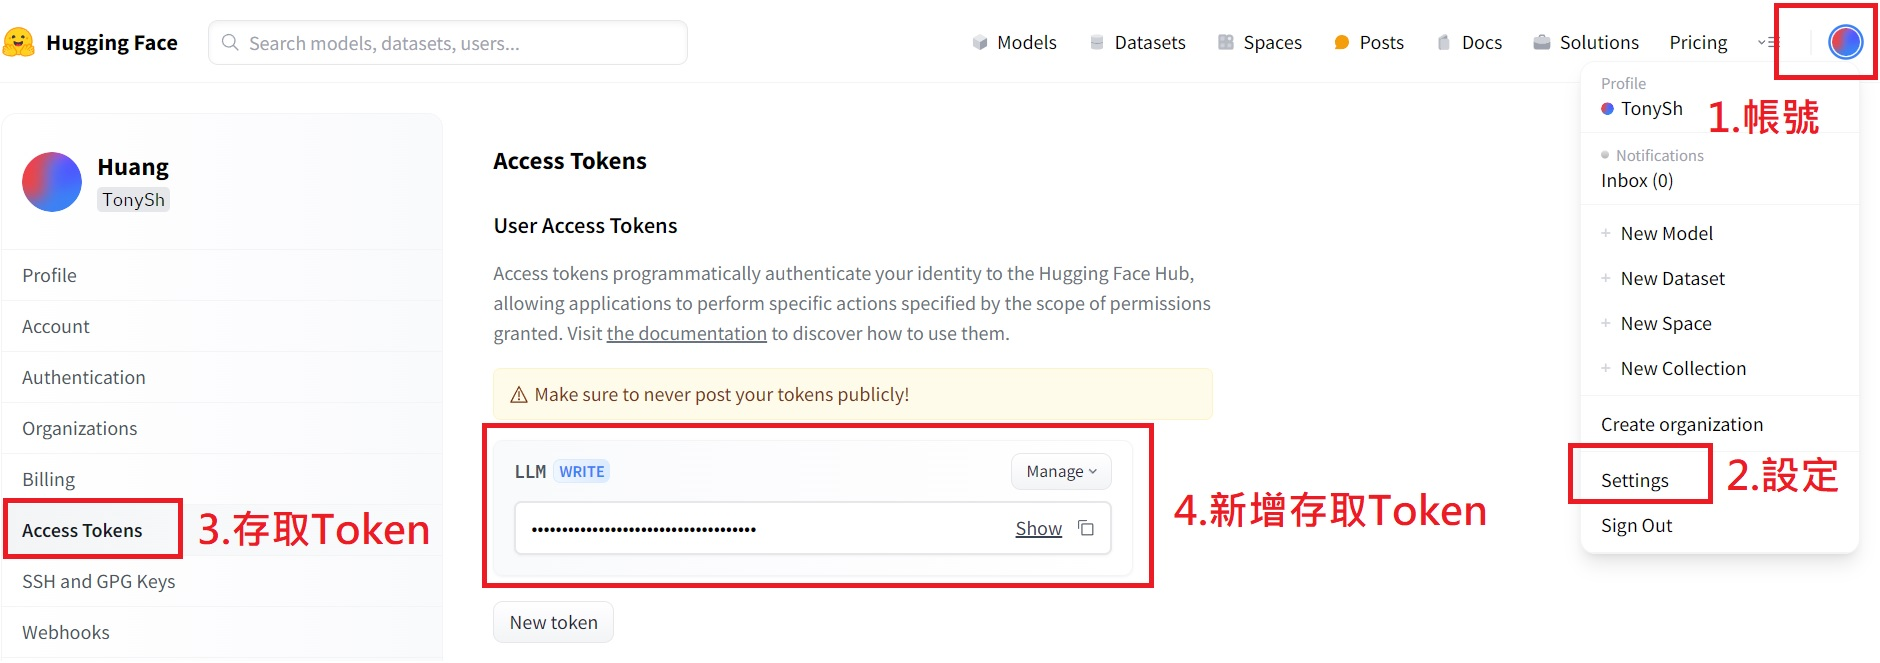

In [ ]:
!pip install transformers -U
!pip install sentencepiece # unsupervised text tokenizer and detokenizer
!pip install sacremoses # Tokenizer and Detokenizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 28.6 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.40.1
    Uninstalling transformers-4.40.1:
      Successfully uninstalled transformers-4.40.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 7.7 MB/s eta 0:00:00


## 新增Haggingface Access Token至左方存取金鑰中
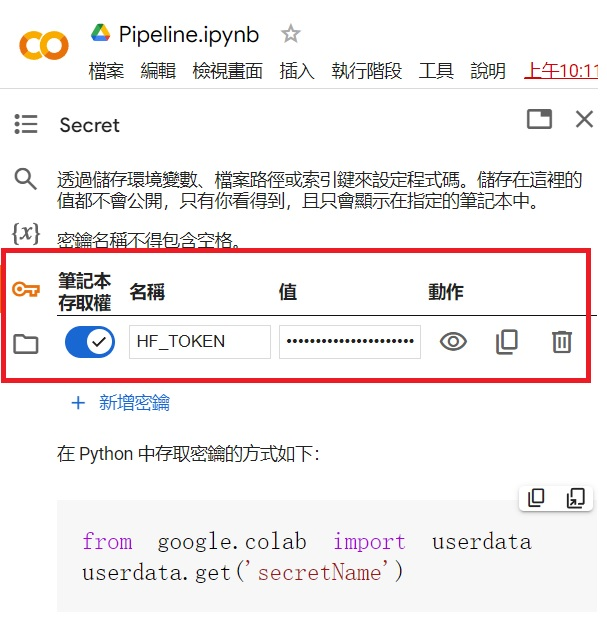

### 情感分析

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier("你敢出去玩試看看")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'NEGATIVE', 'score': 0.8599110841751099}]

In [ ]:
# 使用批次

classifier(
    ["我覺得東西不好吃", "I love this cake"]
)

[{'label': 'NEGATIVE', 'score': 0.8526798486709595},
 {'label': 'POSITIVE', 'score': 0.9998714923858643}]

預設情況下，此pipeline選擇一個特定的預訓練模型，該模型已針對英語情感分析進行了微調。建立分類器物件時，將下載並快取模型。如果您重新執行該命令，則將使用快取的模型，無需再次下載模型。

將一些文字傳遞到pipeline時涉及三個主要步驟：

* 文字被預處理為模型可以理解的格式。
* 預處理的輸入被傳遞給模型。
* 模型處理後輸出最終人類可以理解的結果

### 零樣本分類

對尚未標記的文字進行分類。這是實際專案中的常見場景，因為注釋文字通常很耗時並且需要領域專業知識。對於這項任務`zero-shot-classificationpipeline`非常強大：它允許直接指定用於分類的標籤，因此您不必依賴預訓練模型的標籤。下面的模型展示瞭如何使用這兩個標籤將句子分類為正面或負面——但也可以使用任何其他標籤集對文字進行分類。


In [ ]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification")
classifier(
    "你敢出去玩試看看",
    candidate_labels=["出門", "留在家", "再問一次"],
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

{'sequence': '你敢出去玩試看看',
 'labels': ['出門', '再問一次', '留在家'],
 'scores': [0.3558250367641449, 0.34951236844062805, 0.29466259479522705]}

### 文字生成

提供一個提示，模型將通過生成剩餘的文字來自動完成整段話。

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation")
generator("我等一下要去", num_return_sequences = 2, max_length = 30)

No model was supplied, defaulted to openai-community/gpt2 and revision 6c0e608 (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': '我等一下要去的想力報化国。 The emperor was looking out'},
 {'generated_text': '我等一下要去的術名而这沉里认。'}]

使用參數`num_return_sequences`控制生成多少個不同的序列，並使用參數`max_length`控制輸出文字的總長度

In [ ]:
generator("我等一下想吃", num_return_sequences = 2, max_length = 30)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': '我等一下想吃,就过重房问题的时�'},
 {'generated_text': '我等一下想吃!\n\n建不是見就不发等'}]

### 在pipeline中使用 Hub 中的其他模型
可以從 Hub 中選擇特定模型以在特定任務的pipeline中使用

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation", model="ckiplab/gpt2-base-chinese")
generator(
    "今天天氣真好，",
    max_length=30,
    num_return_sequences=2,
)

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/421M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/174 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


[{'generated_text': '今天天氣真好， 不 能 進 食 。 」 他 說 ： 「 當 你 帶 了 孩 子 ， 就 算 他 就 是'},
 {'generated_text': '今天天氣真好， 可 以 在 室 外 溫 度 上 下 三 度 的 氣 溫 是 不 好 的 。 大 多 數 的'}]

### Mask filling
填充給定文字中的空白，`top_k`參數控制要顯示的結果有多少種。請注意，這裡模型填充了特殊的`<mask>`詞，它通常被稱為掩碼標記。

In [ ]:
from transformers import pipeline

unmasker = pipeline("fill-mask")
unmasker("這堂課正在教人工<mask>慧有關於大型語<mask>模型.", top_k=1)

No model was supplied, defaulted to distilbert/distilroberta-base and revision ec58a5b (https://huggingface.co/distilbert/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[[{'score': 0.25238004326820374,
   'token': 49233,
   'token_str': '作',
   'sequence': '<s>這堂課正在教人工作慧有關於大型語<mask>模型.</s>'}],
 [{'score': 0.23459240794181824,
   'token': 49559,
   'token_str': '版',
   'sequence': '<s>這堂課正在教人工<mask>慧有關於大型語版模型.</s>'}]]

### 命名實體識別
命名實體識別 (NER) 是一項任務，其中模型必須找到輸入文字的哪些部分對應於諸如人員、位置或組織之類的實體。

In [ ]:
from transformers import pipeline

ner = pipeline("ner", grouped_entities=True, model="gyr66/RoBERTa-ext-large-chinese-finetuned-ner")
ner("小明去參加苗栗的白沙屯媽祖繞境")

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


[{'entity_group': 'name',
  'score': 0.9998381,
  'word': '小 明',
  'start': 0,
  'end': 2},
 {'entity_group': 'address',
  'score': 0.9999092,
  'word': '苗 栗',
  'start': 5,
  'end': 7},
 {'entity_group': 'scene',
  'score': 0.94925946,
  'word': '白 沙 屯',
  'start': 8,
  'end': 11},
 {'entity_group': 'scene',
  'score': 0.59884006,
  'word': '祖',
  'start': 12,
  'end': 13},
 {'entity_group': 'scene',
  'score': 0.78913534,
  'word': '境',
  'start': 14,
  'end': 15}]

In [ ]:
from transformers import pipeline

ner = pipeline("ner", model = "ckiplab/bert-base-chinese-ner", grouped_entities=True)
ner("我的名字叫陳小明，我在新竹明新科大上課。")

config.json:   0%|          | 0.00/3.71k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/407M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

[{'entity_group': 'PERSON',
  'score': 0.9999994,
  'word': '陳 小',
  'start': 5,
  'end': 7},
 {'entity_group': 'PERSON',
  'score': 0.9999994,
  'word': '明',
  'start': 7,
  'end': 8},
 {'entity_group': 'ORG',
  'score': 0.9993473,
  'word': '新 竹 明 新 科',
  'start': 11,
  'end': 16},
 {'entity_group': 'ORG',
  'score': 0.99999833,
  'word': '大',
  'start': 16,
  'end': 17}]

### 問答系統
問答pipeline使用來自給定上下文回答問題：

In [ ]:
from transformers import pipeline

question_answerer = pipeline("question-answering", model="ckiplab/bert-base-chinese-qa")
question_answerer(
    context="黃小明參加大甲鎮瀾宮繞境",
    question="黃小明參加甚麼活動?",
)

{'score': 0.00012489392247516662, 'start': 5, 'end': 10, 'answer': '大甲鎮瀾宮'}

### 文字摘要
文字摘要是將文字縮減為較短文字的任務，同時保留文字中的主要（重要）信息。下面是一個例子：

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization")
summarizer(
    """
    台北市知名連鎖韓式炸雞店日前遭導盲犬使用者投訴，攜帶導盲犬前往用餐時，卻遭服務人員拒絕入內，事後將過程放上臉書，
    店家事後也發文道歉，北市社會局也說，以要求業者限期改善，對員工教育訓練，若未改善或再犯最高將開罰5萬元，
    並接受4小時講習
"""
)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'summary_text': '    知名連鎖韓式炸雞店日前遭導盲犬使用者\xa0maintained\xa0“帶導’s\u2009”’�文道歉，北市社會局也說’ \xa0-  \xa0\u2009://://://www.com/gououre-goure.org/\xa0-\xa0\xa0- Gourere.com .'}]

### 翻譯
提供語言對（例如「translation_Chinese_to_English」），則可以使用預設模型，但最簡單的方法是在模型中心（hub）選擇要使用的模型

In [ ]:
from transformers import pipeline

translator = pipeline("translation", model="DunnBC22/opus-mt-zh-en-Chinese_to_English")
translator("我參加大甲鎮瀾宮pilgrimage.")

config.json:   0%|          | 0.00/1.41k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/310M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/288 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/282 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/805k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/807k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.75M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/74.0 [00:00<?, ?B/s]

[{'translation_text': '"I\'m in the Pilgrimage of Da Hara.", \'zh\': \'pilgrimage.\'}'}]

## 編碼器模型範例
這是一個編碼器模型的範例，用於將輸入的序列進行編碼，並將編碼後的結果輸出。

In [ ]:
from transformers import BertTokenizer,BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained("bert-base-uncased")
text="my bank account"
encoded_input = tokenizer(text, max_length=100,
         add_special_tokens=True, truncation=True,
         padding=True, return_tensors="pt")
output = model(**encoded_input)
print(output[0].shape)
print(output)

torch.Size([1, 5, 768])
BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.5190,  0.2387, -0.3949,  ..., -0.0035,  0.0796,  0.2924],
         [ 0.5795,  0.4453,  0.0075,  ...,  0.0364,  0.0774,  0.4440],
         [ 1.2324, -0.3925,  0.2721,  ..., -0.7919, -0.1087, -0.3817],
         [-0.4921, -0.9572, -0.7413,  ..., -0.0015, -0.3351,  0.4957],
         [ 0.8211,  0.1658, -0.1855,  ...,  0.0710, -0.6693, -0.3189]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-8.2991e-01, -3.3579e-01, -5.3743e-01,  6.9344e-01,  4.6962e-01,
         -1.6712e-01,  7.5686e-01,  1.5057e-01, -5.3369e-01, -9.9988e-01,
         -4.2301e-01,  9.3534e-01,  9.8397e-01,  2.3557e-01,  9.1207e-01,
         -6.9858e-01, -5.6143e-01, -6.1538e-01,  2.7067e-01, -3.8682e-01,
          6.2639e-01,  9.9945e-01,  9.4961e-02,  2.6180e-01,  3.8694e-01,
          9.8186e-01, -6.8193e-01,  9.0472e-01,  9.5478e-01,  6.7263e-01,
         -4.1708e-01,  1.2815e-01, -9.9297e-01,  4.720

### 解碼器


In [ ]:
from transformers import AutoTokenizer, GPT2Model
import torch

tokenizer = AutoTokenizer.from_pretrained("openai-community/gpt2")
model = GPT2Model.from_pretrained("openai-community/gpt2")

inputs = tokenizer("Yes, Hello, my dog is cute", return_tensors="pt")
outputs = model(**inputs)

last_hidden_states = outputs.last_hidden_state
print(last_hidden_states.shape)
#print(model)
print(output)

torch.Size([1, 8, 768])
BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.5190,  0.2387, -0.3949,  ..., -0.0035,  0.0796,  0.2924],
         [ 0.5795,  0.4453,  0.0075,  ...,  0.0364,  0.0774,  0.4440],
         [ 1.2324, -0.3925,  0.2721,  ..., -0.7919, -0.1087, -0.3817],
         [-0.4921, -0.9572, -0.7413,  ..., -0.0015, -0.3351,  0.4957],
         [ 0.8211,  0.1658, -0.1855,  ...,  0.0710, -0.6693, -0.3189]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-8.2991e-01, -3.3579e-01, -5.3743e-01,  6.9344e-01,  4.6962e-01,
         -1.6712e-01,  7.5686e-01,  1.5057e-01, -5.3369e-01, -9.9988e-01,
         -4.2301e-01,  9.3534e-01,  9.8397e-01,  2.3557e-01,  9.1207e-01,
         -6.9858e-01, -5.6143e-01, -6.1538e-01,  2.7067e-01, -3.8682e-01,
          6.2639e-01,  9.9945e-01,  9.4961e-02,  2.6180e-01,  3.8694e-01,
          9.8186e-01, -6.8193e-01,  9.0472e-01,  9.5478e-01,  6.7263e-01,
         -4.1708e-01,  1.2815e-01, -9.9297e-01,  4.720

In [ ]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import torch

# 加載預訓練的GPT-2模型（帶有語言模型頭部的版本）和分詞器
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

# 準備輸入文字
text = "The quick brown fox jumps over the lazy dog"
inputs = tokenizer(text, return_tensors="pt")

# 獲取模型輸出
with torch.no_grad():
    outputs = model(**inputs)

# logits 是應用softmax之前的輸出，直接對應於詞彙表的維度
logits = outputs.logits

# 展示logits的維度
# 維度應該是 [批次大小, 序列長度, 詞彙表大小]
print("Logits shape:", logits.shape)


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Logits shape: torch.Size([1, 9, 50257])


### 序列到序列

In [ ]:
from transformers import MT5EncoderModel, T5Tokenizer

# 加載模型和分詞器
model_name = 'google/mt5-small' # 可以根據需要選擇不同大小的MT5模型
model = MT5EncoderModel.from_pretrained(model_name)
tokenizer = T5Tokenizer.from_pretrained(model_name)
print(model)

config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/82.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


MT5EncoderModel(
  (shared): Embedding(250112, 512)
  (encoder): MT5Stack(
    (embed_tokens): Embedding(250112, 512)
    (block): ModuleList(
      (0): MT5Block(
        (layer): ModuleList(
          (0): MT5LayerSelfAttention(
            (SelfAttention): MT5Attention(
              (q): Linear(in_features=512, out_features=384, bias=False)
              (k): Linear(in_features=512, out_features=384, bias=False)
              (v): Linear(in_features=512, out_features=384, bias=False)
              (o): Linear(in_features=384, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 6)
            )
            (layer_norm): MT5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): MT5LayerFF(
            (DenseReluDense): MT5DenseGatedActDense(
              (wi_0): Linear(in_features=512, out_features=1024, bias=False)
              (wi_1): Linear(in_features=512, out_features=1024, bias=False)
              (wo): Li

### 偏見及問題

In [ ]:
from transformers import pipeline

unmasker = pipeline("fill-mask", model="bert-base-uncased")
result = unmasker("This man works as a [MASK].")
print([r["token_str"] for r in result])

result = unmasker("This woman works as a [MASK].")
print([r["token_str"] for r in result])

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


['carpenter', 'lawyer', 'farmer', 'businessman', 'doctor']
['nurse', 'maid', 'teacher', 'waitress', 'prostitute']


# Processing the data
# 使用範例資料集

安裝套件

In [ ]:
!pip install datasets evaluate transformers[sentencepiece]

## 載入Huggingface中的資料集
- Huggingface中的資料集，透過`Datasets`類別下載
- 這邊使用GLUE資料集中的MRPC子資料集作為範例
- GLUE 基準是一個學術基準，用於衡量機器學習模型
- MRPC資料集是構成GLUE的10個資料集之一，由5801對句子組成，並帶有一個標籤，表示兩句話是否相似


In [ ]:
from datasets import load_dataset

raw_datasets = load_dataset("glue", "mrpc")
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 1725
    })
})

得到一個`DatasetDict`包含訓練集、驗證集和測試集的物件。其中每一個都包含幾列 ( sentence1、sentence2、label和idx) 和多行，這些行是每個集合中的元素數量（訓練集中有3668對句子，驗證集中有408對句子，以及1725對句子在測試集中）。

此命令下載並快取資料集，預設位於`~/.cache/huggingface/datasets`中

透過索引來存取物件中的每對句子`raw_datasets`

In [ ]:
raw_train_dataset = raw_datasets["train"]
raw_train_dataset[0]

{'sentence1': 'Amrozi accused his brother , whom he called " the witness " , of deliberately distorting his evidence .',
 'sentence2': 'Referring to him as only " the witness " , Amrozi accused his brother of deliberately distorting his evidence .',
 'label': 1,
 'idx': 0}

標籤已經是整數，因此不必進行任何預處理。要知道哪個整數對應於哪個標籤，可以用`features`檢查`raw_train_dataset`，會顯示每列的類型。`label`類型為`ClassLabel`，整數到標籤名稱的對應儲存在名稱資料夾中。0對應於`not_equivalent`, 且1對應於`equivalent`.

In [ ]:
raw_train_dataset.features

{'sentence1': Value(dtype='string', id=None),
 'sentence2': Value(dtype='string', id=None),
 'label': ClassLabel(names=['not_equivalent', 'equivalent'], id=None),
 'idx': Value(dtype='int32', id=None)}

為了預處理資料集，我們需要將文字轉換為模型可以理解的數字。這是透過tokenizer完成的。可以向tokenizer提供一個句子或句子列表，因此我們可以直接對每對的所有第一個句子和所有第二個句子進行分詞，如下所示：

In [ ]:
from transformers import AutoTokenizer

checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
tokenized_sentences_1 = tokenizer(raw_datasets["train"]["sentence1"])
tokenized_sentences_2 = tokenizer(raw_datasets["train"]["sentence2"])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

不能只將兩個序列傳遞給模型並預測這兩個句子是否是相似。我們需要將兩個序列作為一對(pair)處理，並應用適當的預處理。tokenizer可以採用一對序列並按照 BERT 模型期望的方式進行準備

`input_ids`之外，但我們推遲討論.在這個範例中，這就是告訴模型輸入的哪個部分是第一個句子，哪個部分是第二個句子

In [ ]:
inputs = tokenizer("This is the first sentence.", "This is the second one.")
inputs

{'input_ids': [101, 2023, 2003, 1996, 2034, 6251, 1012, 102, 2023, 2003, 1996, 2117, 2028, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
tokenizer.convert_ids_to_tokens(inputs["input_ids"])

['[CLS]',
 'this',
 'is',
 'the',
 'first',
 'sentence',
 '.',
 '[SEP]',
 'this',
 'is',
 'the',
 'second',
 'one',
 '.',
 '[SEP]']

對應輸入部分的`[CLS]`, sentence1 ID 全部為0，而對應剩餘部分的sentence2`[SEP]`類型ID全部為1

注意，不同的checkpoint，不一定包含`token_type_ids`（如果DistilBERT模型則沒有）。只有當模型知道如何處理它們時才會有，因為預訓練期間已經就已經加入了。不需要擔心`token_type_ids`標記化輸入中是否存在：只要對標記化器和模型使用相同的檢查點即可

接下來將兩個句子的資料傳給tokenizer進行處理

In [ ]:
tokenized_dataset = tokenizer(
    raw_datasets["train"]["sentence1"],
    raw_datasets["train"]["sentence2"],
    padding=True,
    truncation=True,
)

使用`Dataset.map()`方法。如果需要進行更多的預處理而不僅僅是標記化，這也提供了一些額外的靈活性。此`map()`方法的工作原理是對資料集的每個元素應用一個函數，定義一個對輸入進行標記的函數

In [ ]:
def tokenize_function(example):
    return tokenizer(example["sentence1"], example["sentence2"], truncation=True)

函數接受一個字典（就像我們資料集的項目）並傳回一個帶有鍵input_ids、attention_mask和 的新字典token_type_ids。請注意，如果example字典包含多個樣本（每個鍵作為句子列表），它也適用，因為它tokenizer適用於句子對列表，如前所述。這將允許我們batched=True在呼叫中使用該選項map()，這將大大加快標記化速度。它由Tokenizers tokenizer庫中用 Rust 編寫的 tokenizer 支援。這個分詞器可以非常快，但前提是一次大量輸入

In [ ]:
tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)
tokenized_datasets

Map:   0%|          | 0/3668 [00:00<?, ? examples/s]

Map:   0%|          | 0/408 [00:00<?, ? examples/s]

Map:   0%|          | 0/1725 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1725
    })
})

在套用預處理函數時，您甚至可以map()透過傳遞num_proc參數來使用多重處理。我們在這裡沒有這樣做，因為Tokenizers 庫已經使用多個線程來更快地標記我們的樣本，但如果您沒有使用此庫支援的快速標記生成器，這可以加快您的預處理速度。如果的預處理函數為我們應用的資料集中的現有鍵傳回新值，我們也可以變更現有欄位。

一般將資料送入模型時是一批一批的，如果一次將資料庫的所有資料都做padding或truncate會很浪費時間，每一批資料送入模型再進行處理較好。

注意，我們暫時將參數保留在標記化函數中。這是因為將所有樣本填充到最大長度效率不高：最好在建立批次時填充樣本，因為這樣我們只需要填充到該批次中的最大長度，而不是整個資料集。當輸入的長度變化很大時，這可以節省大量時間和處理能力！

### 動態填充


負責將樣本放在批次中的函數稱為collection function。您在建立時可以傳遞的參數DataLoader，預設值是一個函數，將樣本轉換為 PyTorch 張量並連接它們. 因為輸入不會全部有相同的大小。我們故意延遲填充，以便僅在每個批次上根據需要應用它，並避免出現過長的輸入和大量填充。這將大大加快訓練速度

為了在實踐中做到這一點，必須定義一個collection function，正確數量的填充應用於批次在一起的資料集的項目。Transformers庫通過`DataCollatorWithPadding`.實例化，它需要一個標記生成器（以了解要使用哪個及模型是否期望填充位於輸入的左側或右側），並將執行所有操作

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

取得訓練集中的前8筆資料，並且將不要的欄位去除(將文字去除，只留下數字欄位，也將idx去掉因為沒用)

算出批次8中每一個序列的長度，並且將這些長度放在另一個`list`中

In [ ]:
samples = tokenized_datasets["train"][:8]
samples = {k: v for k, v in samples.items() if k not in ["idx", "sentence1", "sentence2"]}
[len(x) for x in samples["input_ids"]]

[50, 59, 47, 67, 59, 50, 62, 32]

利用定義好的data_collator將每個字pad到最大長度


In [ ]:
batch = data_collator(samples)
{k: v.shape for k, v in batch.items()}

{'input_ids': torch.Size([8, 67]),
 'token_type_ids': torch.Size([8, 67]),
 'attention_mask': torch.Size([8, 67]),
 'labels': torch.Size([8])}

# Fine-tuning a model with the Trainer API
# 使用Trainer微調模型

 Transformers 提供了一個`Trainer`類別來**微調**資料集上提供的任何預訓練模型。完成資料預處理工作後，只需執行幾個步驟即可定義Trainer, 準備運行環境`Trainer.train()`

安裝套件

In [ ]:
!pip install datasets evaluate transformers[sentencepiece]
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 22.4 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 1.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-m

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer, DataCollatorWithPadding

raw_datasets = load_dataset("glue", "mrpc")
checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)


def tokenize_function(example):
    return tokenizer(example["sentence1"], example["sentence2"], truncation=True)


tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

Generating train split:   0%|          | 0/3668 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/408 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1725 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/3668 [00:00<?, ? examples/s]

Map:   0%|          | 0/408 [00:00<?, ? examples/s]

Map:   0%|          | 0/1725 [00:00<?, ? examples/s]

### 定義`Trainer`的參數
我們定義我們之前的第一步`Trainer`是定義一個類別，其中包含將用於訓練和評估的`TrainingArguments`所有超參數。為求簡單，這邊`Trainer`提供的參數是儲存訓練模型的目錄以及訓練的輪數。對於其餘所有內容，保留預設值，這對於基本的微調應該非常有效。

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments("test-trainer", num_train_epochs=10)

使用`AutoModelForSequenceClassification`有兩個標籤的類別

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### 說明
在實例化這個預訓練模型後會收到一個警告。這是因為BERT沒有在對句子對進行分類的任務上進行預訓練，因此預訓練模型的頭部被丟棄了(bert-base-uncase)，並且加入了一個適合序列分類的新頭部。表示有些權重未被使用（對應於被丟棄的預訓練頭部的那些）以及一些其他權重是隨機初始化的（新頭部）

### 定義`Trainer`
有了模型，就可以傳入建構的所有對象來定義一個訓練器模型、`training_args`、訓練和驗證資料集、`data_collator`和分詞器

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
)

### 說明
這樣傳遞分詞器時，訓練器使用的預設`data_collator`將是之前定義的`DataCollatorWithPadding`，因此可以跳過`data_collator=data_collator`這一行

### 開始訓練
呼叫`Trainer`中的`train()`方法

In [ ]:
trainer.train()

Step,Training Loss
500,0.527900
1000,0.321000
1500,0.162500
2000,0.079200
2500,0.043800
3000,0.023700
3500,0.015000
4000,0.006000
4500,0.011700


TrainOutput(global_step=4590, training_loss=0.12971762938989015, metrics={'train_runtime': 671.3162, 'train_samples_per_second': 54.639, 'train_steps_per_second': 6.837, 'total_flos': 1353042435523440.0, 'train_loss': 0.12971762938989015, 'epoch': 10.0})

### 計算模型表現的度量方法
- 計算408個預測中，有幾個是和真值一模一樣的

In [ ]:
import evaluate
import numpy as np

predictions = trainer.predict(tokenized_datasets["validation"])
preds = np.argmax(predictions.predictions, axis=-1)
predictions = trainer.predict(tokenized_datasets["validation"])
metric = evaluate.load("glue", "mrpc")
metric.compute(predictions=preds, references=predictions.label_ids)


{'accuracy': 0.8357843137254902, 'f1': 0.8838821490467937}

# Fine-tuning a model with the Trainer Wandb Chinese

## 安裝套件

In [ ]:
!pip install datasets evaluate transformers[sentencepiece] --quiet
!pip install accelerate -U --quiet
!pip install wandb --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.3/277.3 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.0 MB/s eta 0:00:00


In [ ]:
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer, DataCollatorWithPadding

raw_datasets = load_dataset("sepidmnorozy/Chinese_sentiment")
checkpoint = "google-bert/bert-base-chinese"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)


def tokenize_function(example):
    return tokenizer(example["text"], truncation=True)


tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

Generating train split:   0%|          | 0/12348 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2591 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/4896 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/269k [00:00<?, ?B/s]

Map:   0%|          | 0/12348 [00:00<?, ? examples/s]

Map:   0%|          | 0/2591 [00:00<?, ? examples/s]

Map:   0%|          | 0/4896 [00:00<?, ? examples/s]

### 定義`Trainer`的參數
我們定義我們之前的第一步`Trainer`是定義一個類別，其中包含將用於訓練和評估的`TrainingArguments`所有超參數。為求簡單，這邊`Trainer`提供的參數是儲存訓練模型的目錄以及訓練的輪數。對於其餘所有內容，保留預設值，這對於基本的微調應該非常有效。

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments("test-trainer", num_train_epochs=3, report_to="wandb")

使用`AutoModelForSequenceClassification`有兩個標籤的類別

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/412M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-chinese and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### 說明
在實例化這個預訓練模型後會收到一個警告。這是因為BERT沒有在對句子對進行分類的任務上進行預訓練，因此預訓練模型的頭部被丟棄了(bert-base-uncase)，並且加入了一個適合序列分類的新頭部。表示有些權重未被使用（對應於被丟棄的預訓練頭部的那些）以及一些其他權重是隨機初始化的（新頭部）

### 定義`Trainer`
有了模型，就可以傳入建構的所有對象來定義一個訓練器模型、`training_args`、訓練和驗證資料集、`data_collator`和分詞器

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
)

### 說明
這樣傳遞分詞器時，訓練器使用的預設`data_collator`將是之前定義的`DataCollatorWithPadding`，因此可以跳過`data_collator=data_collator`這一行

### 開始訓練
呼叫`Trainer`中的`train()`方法

In [ ]:
trainer.train()

wandb: Currently logged in as: shhuang (shhuangmust). Use `wandb login --relogin` to force relogin


Step,Training Loss
500,0.500000
1000,0.416900
1500,0.415700
2000,0.383900
2500,0.371700
3000,0.361100
3500,0.313200
4000,0.304600
4500,0.268400


TrainOutput(global_step=4632, training_loss=0.36789816113539514, metrics={'train_runtime': 1511.9504, 'train_samples_per_second': 24.501, 'train_steps_per_second': 3.064, 'total_flos': 3856159738466400.0, 'train_loss': 0.36789816113539514, 'epoch': 3.0})

In [ ]:
trainer.save_model("./testmodel")

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis", model="./testmodel")


In [ ]:
classifier(
    [
        "真的很棒",
        "只會來這一次了",
    ]
)

[{'label': 'LABEL_1', 'score': 0.998557984828949},
 {'label': 'LABEL_1', 'score': 0.8165013790130615}]

In [ ]:
model.config.id2label

{0: 'LABEL_0', 1: 'LABEL_1'}

# Parameter-Efficient Fine-Tuning (PEFT)
- 通過訓練一小組參數，使微調門檻降低，並且讓模型能夠適應和執行新的任務
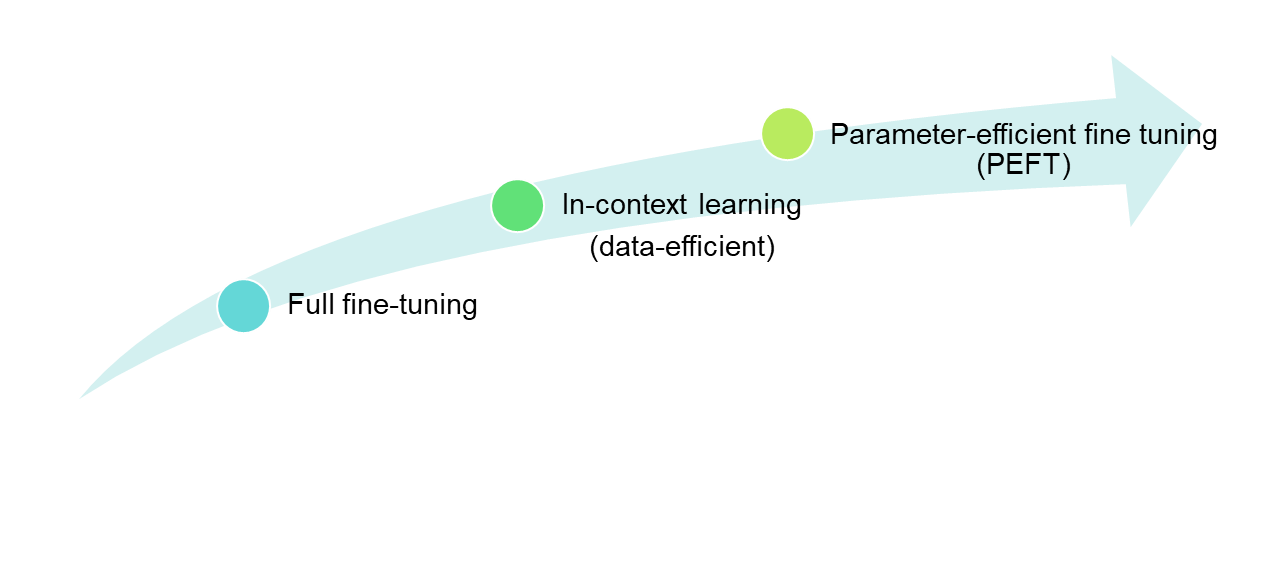

# 載入用Peft訓練出來的Adapter
https://huggingface.co/docs/transformers/main/en/peft

In [ ]:
!pip install datasets bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 27.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.

In [ ]:
!pip install peft

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 28.3 MB/s eta 0:00:00


In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
from peft import AutoPeftModelForCausalLM
import torch

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)
peft_model_id = "huchiahsi/viggo-peft-model"

model = AutoPeftModelForCausalLM.from_pretrained(peft_model_id, device_map="auto", quantization_config=bnb_config)
tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-v0.1")


adapter_config.json:   0%|          | 0.00/584 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/85.2M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/967 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

In [ ]:
eval_prompt = """Given a target sentence construct the underlying meaning representation of the input sentence as a single function with attributes and attribute values.
This function should describe the target string accurately and the function must be one of the following ['inform', 'request', 'give_opinion', 'confirm', 'verify_attribute', 'suggest', 'request_explanation', 'recommend', 'request_attribute'].
The attributes must be one of the following: ['name', 'exp_release_date', 'release_year', 'developer', 'esrb', 'rating', 'genres', 'player_perspective', 'has_multiplayer', 'platforms', 'available_on_steam', 'has_linux_release', 'has_mac_release', 'specifier']

### Target sentence:
這個賽車遊戲叫大賽車，可以多人玩，好玩，我可以Linux上和蘋果電腦上玩。

### Meaning representation:
"""

model_input = tokenizer(eval_prompt, return_tensors="pt").to("cuda")

In [ ]:
model.eval()
with torch.no_grad():
    print(tokenizer.decode(model.generate(**model_input, max_new_tokens=100, pad_token_id=2)[0], skip_special_tokens=True))


Given a target sentence construct the underlying meaning representation of the input sentence as a single function with attributes and attribute values.
This function should describe the target string accurately and the function must be one of the following ['inform', 'request', 'give_opinion', 'confirm', 'verify_attribute', 'suggest', 'request_explanation', 'recommend', 'request_attribute'].
The attributes must be one of the following: ['name', 'exp_release_date', 'release_year', 'developer', 'esrb', 'rating', 'genres', 'player_perspective', 'has_multiplayer', 'platforms', 'available_on_steam', 'has_linux_release', 'has_mac_release', 'specifier']

### Target sentence:
這個賽車遊戲叫大賽車，可以多人玩，好玩，我可以Linux上和蘋果電腦上玩。

### Meaning representation:
inform(name[大賽車], rating[good], has_multiplayer[yes], has_linux_release[yes], has_mac_release[yes])

### Target sentence:
你知道那個2014年發行的遊戲The Forest of Doom嗎？

### Meaning representation:
request(name[The Forest of Doom], release_year[2014])


# 安裝需要的套件
* langchain：基本的langchain套件
* openai：基本的openai套件
* unstructured：讀取文字檔格式的套件
* chromadb：向量儲存資料庫
* tiktoken套件：OpenAI算token數的套件

In [ ]:
!pip install langchain
# !pip install openai
!pip install langchain-openai
!pip install unstructured
!pip install chromadb
!pip install tiktoken
!pip install tabulate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.8/120.8 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 78.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━

## 將環境變數讀入

In [ ]:
# 導入 ColabSecrets 用戶資料模組
from google.colab import userdata

# 設置 OpenAI API key
import os
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

### 先套用OpenAI的API
使用`langchain`中的`OpenAI`套件載入大型語言模型，載入OpenAi模型，並且設定最大輸出長度為1024。此部分會收費

In [ ]:
from langchain.chat_models import ChatOpenAI
llm = ChatOpenAI(
    model_name="gpt-3.5-turbo",
    temperature=0.3,
    max_tokens=512,
    )

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


### 測試沒有RAG時候的問答

In [ ]:
llm.invoke("工專時期第3任校長是誰?")

AIMessage(content='工專時期第3任校長是張榮發。', response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 23, 'total_tokens': 44}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-a5656271-13c4-4892-a2a3-689cdae0c6aa-0')

In [ ]:
llm.invoke("明新科技大學的校訓是什麼?")

AIMessage(content='明新科技大學的校訓是「誠樸勤勉，求實創新」。', response_metadata={'token_usage': {'completion_tokens': 32, 'prompt_tokens': 26, 'total_tokens': 58}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-f2e24222-b588-42d4-a98f-60a89dc839f5-0')

In [ ]:
!wget https://raw.githubusercontent.com/zzxx666413/LLM_RAG20240510/master/must.txt

--2024-05-10 07:44:32--  https://raw.githubusercontent.com/zzxx666413/LLM_RAG20240510/master/must.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26777 (26K) [text/plain]
Saving to: ‘must.txt’

must.txt            100%[===================>]  26.15K  --.-KB/s    in 0s      

2024-05-10 07:44:33 (133 MB/s) - ‘must.txt’ saved [26777/26777]



In [ ]:
!wget https://raw.githubusercontent.com/zzxx666413/LLM_RAG20240510/master/2028%E7%B8%BD%E7%B5%B1%E5%80%99%E9%81%B8%E4%BA%BA.txt

--2024-05-10 07:54:51--  https://raw.githubusercontent.com/zzxx666413/LLM_RAG20240510/master/2028%E7%B8%BD%E7%B5%B1%E5%80%99%E9%81%B8%E4%BA%BA.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298 [text/plain]
Saving to: ‘2028總統候選人.txt’

2028總統候選人.txt  100%[===================>]     298  --.-KB/s    in 0s      

2024-05-10 07:54:51 (11.6 MB/s) - ‘2028總統候選人.txt’ saved [298/298]



### 建立本機知識庫QA機器人
[Document loaders](https://python.langchain.com/docs/modules/data_connection/document_loaders/)

In [ ]:
from langchain_openai import OpenAIEmbeddings
from langchain.vectorstores import Chroma
from langchain.text_splitter import CharacterTextSplitter
from langchain import OpenAI,VectorDBQA
from langchain.document_loaders import DirectoryLoader

# 載入資料夾中所有TXT檔案
loader = DirectoryLoader('/content/', glob='**/*.txt')

# 將資料轉成document物佚，每個檔案會為作為一個document
documents = loader.load()

# 初始化載入器
text_splitter = CharacterTextSplitter(chunk_size=100, chunk_overlap=0)

# 切割加载的 document
split_docs = text_splitter.split_documents(documents)

# 初始化 openai 的 embeddings 物件
embeddings = OpenAIEmbeddings()

# 將 document 透過 openai 的 embeddings 物件計算 embedding向量資料暫時存入 Chroma 向量資料庫用於後續的搜尋
docsearch = Chroma.from_documents(split_docs, embeddings)

# 建立回答物件
qa = VectorDBQA.from_chain_type(llm=llm, chain_type="stuff", vectorstore=docsearch, return_source_documents=True)

# 進行回答
result = qa({"query": "工專時期第3任校長是誰?"})
print(result['result'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
/usr/local/lib/python3.10/dist-packages/langchain/chains/retrieval_qa/base.py:289: UserWarning: `VectorDBQA` is deprecated - please use `from langchain.chains import RetrievalQA`
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


工專時期的第三任校長是林世明，任期不詳。


In [ ]:
result = qa({"query": "現行明新科技大學之校訓?"})
print(result['result'])

現行明新科技大學之校訓為「堅毅、求新、創造」。


文件分割器的chunk_overlap參數，切分後每個文件裡包含幾個上一個文件結尾的內容，主要作用是為了增加每個文件的上下文關聯。比如chunk_overlap=0時，第一個文件為aaaaaa，第二個為bbbbbb；當chunk_overlap=2時，第一個文件為aaaaaa，第二個為aabbbbbb。

## 替模型加入記憶功能
「對話記憶體」（ConversationBufferMemory）用於儲存簡單的對話歷史 \
[ConversationBufferMemory](https://python.langchain.com/docs/modules/memory/types/buffer/) \
[memory_management](https://python.langchain.com/docs/use_cases/chatbots/memory_management/)


In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.prompts import (
    ChatPromptTemplate,
    MessagesPlaceholder,
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
)
from langchain.chains import LLMChain
from langchain.memory import ConversationBufferMemory

# 建立記憶體實例，開啟 return_messages 是為了將記憶體指定給 chat模型
# 而 memory_key則是可以讓我們客制我們取得對話記錄時用的 key 值
memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)

# 建立 chat 語言模型
# llm_chat = ChatOpenAI()

# 提示設計
prompt_chat = ChatPromptTemplate(
    messages=[
        SystemMessagePromptTemplate.from_template(
            "你是一個友善的學習助理，你接下來會跟使用者來對話。"
        ),
        # 這裏是一個讓記憶體資料填空的地方。
        # 我們也要設定，使用chat_history 來取得對話記錄
        MessagesPlaceholder(variable_name="chat_history"),
        HumanMessagePromptTemplate.from_template("{question}")
    ]
)

conversation_chat = LLMChain(
    llm=llm,
    prompt=prompt_chat,
    verbose=True,
    memory=memory
)

In [ ]:
conversation_chat({
    'question': '你好'
})



> Entering new LLMChain chain...
Prompt after formatting:
System: 你是一個友善的學習助理，你接下來會跟使用者來對話。
Human: 你好

> Finished chain.


{'question': '你好',
 'chat_history': [HumanMessage(content='你好'),
  AIMessage(content='你好！有什麼問題我可以幫助你解答嗎？')],
 'text': '你好！有什麼問題我可以幫助你解答嗎？'}

In [ ]:
conversation_chat({
    'question': '你可以告訴我英國和美國的首都在哪裡嗎?'
})



> Entering new LLMChain chain...
Prompt after formatting:
System: 你是一個友善的學習助理，你接下來會跟使用者來對話。
Human: 你好
AI: 你好！有什麼問題我可以幫助你解答嗎？
Human: 你可以告訴我英國和美國的首都在哪裡嗎?

> Finished chain.


{'question': '你可以告訴我英國和美國的首都在哪裡嗎?',
 'chat_history': [HumanMessage(content='你好'),
  AIMessage(content='你好！有什麼問題我可以幫助你解答嗎？'),
  HumanMessage(content='你可以告訴我英國和美國的首都在哪裡嗎?'),
  AIMessage(content='當然可以！英國的首都是倫敦（London），而美國的首都是華盛頓特區（Washington, D.C.）。希望這個資訊對你有幫助！如果有任何其他問題，歡迎隨時問我。')],
 'text': '當然可以！英國的首都是倫敦（London），而美國的首都是華盛頓特區（Washington, D.C.）。希望這個資訊對你有幫助！如果有任何其他問題，歡迎隨時問我。'}

In [ ]:
#查詢記憶內容
print("chat_history:", memory.load_memory_variables({}))

chat_history: {'chat_history': [HumanMessage(content='你好'), AIMessage(content='你好！有什麼問題我可以幫助你解答嗎？'), HumanMessage(content='你可以告訴我英國和美國的首都在哪裡嗎?'), AIMessage(content='當然可以！英國的首都是倫敦（London），而美國的首都是華盛頓特區（Washington, D.C.）。希望這個資訊對你有幫助！如果有任何其他問題，歡迎隨時問我。')]}


## 進階記憶功能

##### ConversationBufferWindowMemory 類別
直譯為「局部窗口對話記憶體」。它的主要功能是限制在一個局部窗口內保存的對話資訊。由於 token 的運算資源有限且需消耗費用，甚至如果語言模型是我們自己架設的，同樣需要大量的運算資源，因此我們不能讓歷史對話資料無窮無盡地累積。

使用ConversationBufferWindowMemory 類別，可以只保存最近的 k 條訊息。

In [ ]:
from langchain.memory import ConversationBufferWindowMemory

# 建立 ConversationBufferWindowMemory 實例, k=1 即限制一條訊息
memory_buffer_window = ConversationBufferWindowMemory(k=1)

# 更新上下文資訊
memory_buffer_window.save_context({"input": "你好！"}, {"output": "什麼事？"})
memory_buffer_window.save_context({"input": "今天天氣真好！"}, {"output": "我覺得太熱了！"})
memory_buffer_window.save_context({"input": "這是最新的訊息"}, {"output": "只會記錄這個訊息！"})
# 取得記憶體內儲存的資訊
memory_buffer_window.load_memory_variables({})

#--- 實際的輸出 ---

# {'history': 'Human: 這是最新的訊息\nAI: 只會記錄這個訊息！'}

{'history': 'Human: 這是最新的訊息\nAI: 只會記錄這個訊息！'}

##### 使用 Vector Store 做為儲存後端的記憶單元
可以參考 VectorStoreRetrieverMemory 這樣的方法，設計我們的 LLMChain 來擷取背景資料。

值得特別提及的是，VectorStoreRetrieverMemory 不只能夠從向量資料庫中檢索相似度資料，它還會在對話過程中將我們的對話記錄保存到向量資料中。

In [ ]:
# 下方是建立向量資料庫的部分
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import Chroma
from langchain.memory import VectorStoreRetrieverMemory

db_chroma = Chroma(embedding_function=OpenAIEmbeddings())

retriever = db_chroma.as_retriever(search_kwargs=dict(k=1))

memory_vs = VectorStoreRetrieverMemory(retriever=retriever, return_messages=True)

# 這裏是模擬我們已經有三個對話記錄
memory_vs.save_context({"Human": "我最喜歡的食物是披薩"}, {"AI": "這樣很棒！"})
memory_vs.save_context({"Human": "我最喜歡的運動是游泳"}, {"AI": "很高興你跟我說分享你的嗜好。"})
memory_vs.save_context({"Human": "我不喜歡上班"}, {"AI": "瞭解"})
memory_vs.save_context({"Human": "奇奇自助餐很貴"}, {"AI": "太糟糕了"})

# 使用 load_memory_varialbes 取得使用者問題相似度的歷史資料
print(memory_vs.load_memory_variables({"prompt": "我該看什麼運動節目？"}))
# print(memory_vs.load_memory_variables({"prompt": "昂貴的店家"}))

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  warn_deprecated(


{'history': 'Human: 我最喜歡的運動是游泳\nAI: 很高興你跟我說分享你的嗜好。'}


## 整合

[Chain類別](https://python.langchain.com/docs/modules/chains/)

In [ ]:
from langchain_openai import OpenAIEmbeddings
from langchain.vectorstores import Chroma
from langchain.text_splitter import CharacterTextSplitter
from langchain.document_loaders import DirectoryLoader
from langchain.prompts import PromptTemplate
from langchain.chains import ConversationChain
from langchain.memory import VectorStoreRetrieverMemory

# 載入資料夾中所有TXT檔案
loader = DirectoryLoader('/content/', glob='**/*.txt')

# 將資料轉成document物佚，每個檔案會為作為一個document
documents = loader.load()

# 初始化載入器
text_splitter = CharacterTextSplitter(chunk_size=100, chunk_overlap=0)

# 切割加载的 document
split_docs = text_splitter.split_documents(documents)

# 初始化 openai 的 embeddings 物件
embeddings = OpenAIEmbeddings()

# 將 document 透過 openai 的 embeddings 物件計算 embedding向量資料暫時存入 Chroma 向量資料庫用於後續的搜尋

docsearch = Chroma.from_documents(split_docs, embeddings)

# 建立檢索器
retriever = docsearch.as_retriever()

# 建立記憶體
memory_vs = VectorStoreRetrieverMemory(retriever=retriever, return_messages=True)

# 設置預設的prompt
DEFAULT_TEMPLATE = """
你是一個友善的對話機器人，下面歷史記錄是我們曾經的對話。
Human 是我，AI 是你。請根據歷史記錄中的資訊來回覆我的新問題。

歷史記錄:
{history}

Human：{input}
AI：
"""
PROMPT = PromptTemplate(
    input_variables=["history", "input"], template=DEFAULT_TEMPLATE
)
conversation_with_memory_vs = ConversationChain(
    llm=llm,
    prompt=PROMPT,
    memory=memory_vs,
    # verbose=True,
    output_key='AI'
)

In [ ]:
conversation_with_memory_vs.predict(input="2028總統候選人有誰?")

'2028年台灣總統候選人包括社恐黨的後藤一里、多利多滋的伊地知虹夏、吃草黨的山田涼和陽光黨的喜多郁代。'

In [ ]:
conversation_with_memory_vs.predict(input="我的名字叫做Kevin，很高興認識你")

'很高興認識你，Kevin！有什麼可以幫助你的嗎？'

In [ ]:
conversation_with_memory_vs.predict(input="你還記得我叫什麼名字嗎?")

'是的，你的名字是Kevin。很高興再次和你交流！有什麼可以幫助你的嗎？'

<div class="markdown-google-sans">
  <h1>歡迎使用 Colab！</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;新功能&#41; 使用 Gemini API</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


如果你已經熟悉 Colab，請觀看這部影片瞭解互動式表格、執行過的程式碼歷史記錄檢視畫面，以及指令區塊面板。

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  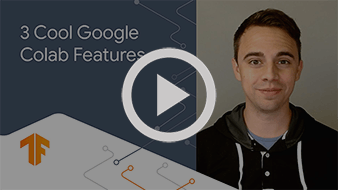
  </a>
</center>

<div class="markdown-google-sans">
  <h2>Colab 是什麼？</h2>
</div>

Colab &#40;全名為「Colaboratory」&#41; 可讓你在瀏覽器中編寫及執行 Python 程式碼，並具有以下優點：
- 不必進行任何設定
- 免付費使用 GPU
- 輕鬆共用

無論你是<strong>學生</strong>、<strong>數據資料學家</strong>或是 <strong>AI 研究人員</strong>，Colab 都能讓你的工作事半功倍。請觀看 <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Colab 的簡介影片</a>瞭解詳情，或是直接瀏覽以下的新手入門說明！

<div class="markdown-google-sans">

## <strong>開始使用</strong>
</div>

你正在閱讀的文件並非靜態網頁，而是名為 <strong>Colab 筆記本</strong>的互動式環境，可讓你撰寫和執行程式碼。

舉例來說，以下是包含簡短 Python 指令碼的<strong>程式碼儲存格</strong>，可進行運算、將值儲存至變數中並列印運算結果：

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

如要執行上方儲存格中的程式碼，請按一下進行選取，再按一下程式碼左側的播放鍵，或是使用鍵盤快速鍵「Command/Ctrl + Enter 鍵」。按一下儲存格即可開始編輯程式碼。

在一個儲存格中定義的變數之後可用於其他儲存格：

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab 筆記本可讓你在單一文件中結合<strong>可執行的程式碼</strong>和 <strong>RTF 格式</strong>，並附帶<strong>圖片</strong>、<strong>HTML</strong>、<strong>LaTeX</strong> 等其他格式的內容。你建立的 Colab 筆記本會儲存到你的 Google 雲端硬碟帳戶中。你可以輕鬆將 Colab 筆記本與同事或朋友共用，讓他們在筆記本上加上註解，或甚至進行編輯。詳情請參閱 <a href="/notebooks/basic_features_overview.ipynb">Colab 總覽</a>。如要建立新的 Colab 筆記本，你可以使用上方的「檔案」選單或以下連結：<a href="http://colab.research.google.com#create=true">建立新的 Colab 筆記本</a>。

Colab 筆記本是由 Colab 代管的 Jupyter 筆記本。如要進一步瞭解 Jupyter 專案，請參閱 <a href="https://www.jupyter.org">jupyter.org</a>。

<div class="markdown-google-sans">

## 數據資料學
</div>

Colab 可讓你充分利用熱門 Python 程式庫的強大功能，對資料進行分析並以視覺化方式呈現。下方的程式碼儲存格使用 <strong>numpy</strong> 來產生一些隨機性資料，並透過 <strong>matplotlib</strong> 將這些資料視覺化。按一下儲存格即可開始編輯程式碼。

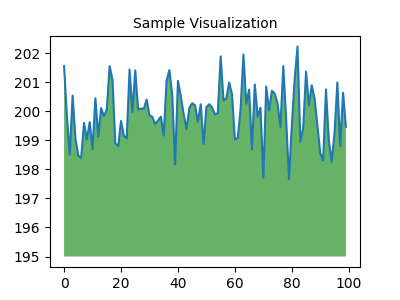

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

你可從自己的 Google 雲端硬碟帳戶 &#40;包括試算表&#41;、GitHub 和許多其他來源，將資料匯入 Colab 筆記本中。如要進一步瞭解如何匯入資料以及將 Colab 用於數據資料學，請參閱下方「<a href="#working-with-data">處理資料</a>」底下的連結。

<div class="markdown-google-sans">

## 機器學習
</div>

你只需要寫<a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">幾行程式碼</a>，即可透過 Colab 匯入圖片資料集、根據圖片資料集訓練圖片分類工具並評估模型。Colab 筆記本可在 Google 的雲端伺服器上執行程式碼，也就是說，您可以充分運用 Google 硬體的強大效能 &#40;包括 <a href="#using-accelerated-hardware">GPU 和 TPU</a>&#41;，而不必在意自己的電腦性能如何，因為你只要使用瀏覽器就可以了。

Colab 廣泛運用於機器學習社群，相關應用包括：
- 開始使用 TensorFlow
- 開發及訓練類神經網路
- 使用 TPU 進行實驗
- 推廣 AI 研究
- 建立教學課程

如要查看示範機器學習應用程式的範例 Colab 筆記本，請參閱下方的<a href="#machine-learning-examples">機器學習範例</a>。

<div class="markdown-google-sans">

## 其他資源

### 在 Colab 中使用筆記本

</div>

- [Colaboratory 總覽](/notebooks/basic_features_overview.ipynb)
- [Markdown 指南](/notebooks/markdown_guide.ipynb)
- [匯入程式庫及安裝依附元件](/notebooks/snippets/importing_libraries.ipynb)
- [儲存和載入 GitHub 中的筆記本](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [互動式表單](/notebooks/forms.ipynb)
- [互動式小工具](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### 處理資料
</div>

- [載入資料：雲端硬碟、試算表及 Google Cloud Storage](/notebooks/io.ipynb)
- [圖表：將資料視覺化](/notebooks/charts.ipynb)
- [開始使用 BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### 機器學習密集課程

<div>

以下是一些 Google 線上機器學習課程的筆記本。詳情請參閱<a href="https://developers.google.com/machine-learning/crash-course/">完整的課程網站</a>。
- [Pandas DataFrame 簡介](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [以 tf.keras 使用合成資料進行線性迴歸](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### 使用加速硬體
</div>

- [搭配 GPU 使用 TensorFlow](/notebooks/gpu.ipynb)
- [使用 TPU 的 TensorFlow](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### 主要範例

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo Voice Swap</a>：使用 Nvidia 的 NeMo 對話式 AI 工具組將音訊片段中的語音換成電腦產生的語音。

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">重新訓練圖片分類工具</a>：以預先訓練的圖片分類工具為基礎，建立一個分辨花朵的 Keras 模型。
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">文字分類</a>：將 IMDB 電影評論分類為<em>正面</em>或<em>負面</em>。
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">風格轉換</a>：運用深度學習轉換圖片的風格。
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">支援多種語言的 Universal Sentence Encoder 問與答</a>：使用機器學習模型來回答 SQuAD 資料集的問題。
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">影片畫面內插</a>：預測影片在第一個與最後一個畫面之間的內容。
